# 1.感知机

## 单层感知机

In [2]:
import torch
from torch.nn import functional as F

In [3]:
# y = x@w+b  [1,10][1,10]+1
x = torch.rand(1,10)
w  = torch.rand(1,10,requires_grad = True)

In [4]:
pred = x@w.t()

In [8]:
output = torch.sigmoid(pred)

In [9]:
loss = F.mse_loss(pred,torch.ones(1,1))

In [10]:
loss.backward()

In [11]:
w.grad

tensor([[2.0364, 5.1876, 3.9602, 4.3044, 4.5467, 5.4742, 5.0117, 0.8722, 5.6551,
         3.7528]])

## 多输出感知机

In [12]:
x = torch.rand(1,10)
w = torch.rand(2,10,requires_grad = True)

In [13]:
pred = x@w.t()

In [14]:
output = torch.sigmoid(pred)

In [15]:
output

tensor([[0.9192, 0.9236]], grad_fn=<SigmoidBackward>)

In [19]:
loss = F.mse_loss(output,torch.ones(1,2))

In [20]:
loss.backward()

In [21]:
w.grad

tensor([[-1.8661e-03, -3.7264e-03, -5.5456e-03, -1.0047e-04, -2.7036e-03,
         -5.0233e-03, -2.1731e-03, -1.8595e-03, -2.9901e-03, -3.8726e-03],
        [-1.6780e-03, -3.3507e-03, -4.9865e-03, -9.0341e-05, -2.4310e-03,
         -4.5169e-03, -1.9540e-03, -1.6720e-03, -2.6887e-03, -3.4822e-03]])

# 2.链式法则求梯度

In [24]:
x = torch.tensor(1)
w1 = torch.tensor(2.,requires_grad = True)
b1 = torch.tensor(1)

In [26]:
w2 = torch.tensor(2.,requires_grad = True)
b2 = torch.tensor(1)

In [29]:
y1 = x*w1+b1
y2 = w2*y1+b2

In [30]:
dy2_dy1 = torch.autograd.grad(y2,[y1],retain_graph=True)
dy1_dw1 = torch.autograd.grad(y1,[w1],retain_graph=True)
dy2_dw1 = torch.autograd.grad(y2,[w1],retain_graph=True)

In [31]:
dy2_dw1

(tensor(2.),)

In [32]:
dy1_dw1

(tensor(1.),)

In [33]:
dy2_dy1

(tensor(2.),)

# 3.对Himmelblau函数的优化实例

## np.meshgrid(X,Y)函数
## 生成网格点坐标矩阵，比如：二维坐标系中，X轴可以取三个值1,2,3，Y轴可以取三个值7，8共可获得6个点的坐标：
## (1,2),(2,7),(3,7)
## (1,8),(2,8),(3,8)

In [39]:
# 首先可视化函数图像
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch import optim

In [35]:
def himmelblau(x):
    return(x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)


In [36]:
X

array([[-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       ...,
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
       [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9]])

In [37]:
Z = himmelblau([X,Y])

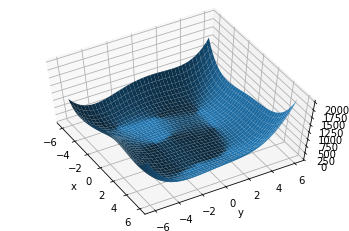

In [38]:
fig = plt.figure('himmeblau')
ax = fig.gca(projection = '3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## 使用随机梯度下降（SGD）进行优化
* 优化目标，找到使函数最小的坐标

In [41]:
x = torch.tensor([0.,0.],requires_grad = True)
optimizer = optim.Adam([x],lr = 1e-3)
for step in range(20000):
    pred = himmelblau(x)
    optimizer.zero_grad()
    pred.backward()
    optimizer.step()
    if step % 2000==0:
        print('step = {0},x = {1},f(x) = {2}'.format(step,x,pred))

step = 0,x = tensor([0.0010, 0.0010], requires_grad=True),f(x) = 170.0
step = 2000,x = tensor([2.3332, 1.9541], requires_grad=True),f(x) = 13.730910301208496
step = 4000,x = tensor([2.9820, 2.0271], requires_grad=True),f(x) = 0.014858869835734367
step = 6000,x = tensor([3.0000, 2.0000], requires_grad=True),f(x) = 1.1074007488787174e-08
step = 8000,x = tensor([3.0000, 2.0000], requires_grad=True),f(x) = 1.5572823031106964e-09
step = 10000,x = tensor([3.0000, 2.0000], requires_grad=True),f(x) = 1.8189894035458565e-10
step = 12000,x = tensor([3.0000, 2.0000], requires_grad=True),f(x) = 1.6370904631912708e-11
step = 14000,x = tensor([3.0000, 2.0000], requires_grad=True),f(x) = 1.8189894035458565e-12
step = 16000,x = tensor([3., 2.], requires_grad=True),f(x) = 0.0
step = 18000,x = tensor([3., 2.], requires_grad=True),f(x) = 0.0


In [42]:
## 改变初始化数值
x = torch.tensor([4.,0.],requires_grad = True)
optimizer = optim.Adam([x],lr = 1e-3)
for step in range(20000):
    pred = himmelblau(x)
#     优化器保存之前的梯度信息
    optimizer.zero_grad()
    pred.backward()
    optimizer.step()
    if step % 2000==0:
        print('step = {0},x = {1},f(x) = {2}'.format(step,x,pred))

step = 0,x = tensor([ 3.9990e+00, -1.0000e-03], requires_grad=True),f(x) = 34.0
step = 2000,x = tensor([ 3.5742, -1.7642], requires_grad=True),f(x) = 0.09904662519693375
step = 4000,x = tensor([ 3.5844, -1.8481], requires_grad=True),f(x) = 2.1100277081131935e-09
step = 6000,x = tensor([ 3.5844, -1.8481], requires_grad=True),f(x) = 2.41016095969826e-10
step = 8000,x = tensor([ 3.5844, -1.8481], requires_grad=True),f(x) = 2.9103830456733704e-11
step = 10000,x = tensor([ 3.5844, -1.8481], requires_grad=True),f(x) = 9.094947017729282e-13
step = 12000,x = tensor([ 3.5844, -1.8481], requires_grad=True),f(x) = 0.0
step = 14000,x = tensor([ 3.5844, -1.8481], requires_grad=True),f(x) = 0.0
step = 16000,x = tensor([ 3.5844, -1.8481], requires_grad=True),f(x) = 0.0
step = 18000,x = tensor([ 3.5844, -1.8481], requires_grad=True),f(x) = 0.0
